In [50]:
from macierzowa_postać import *

In [51]:
import pandas as pd
df_adjacency = pd.DataFrame(adjacency_matrix, index=list_of_albums, columns=list_of_albums)
print("Macierz sąsiedztwa:")
df_adjacency

Macierz sąsiedztwa:


,Starboy,GALLERY,SR3MM,Harder Than Ever,24K Magic,EVERYTHING IS LOVE,Stay Together,Globalization,5 Seconds Of Summer,All Falls Down (feat. Juliander),...,Playboi Carti,The New Classic,Lukas Graham (Blue Album),Lady Wood,So Good,Thunderclouds,The Martin Garrix Collection,Culture II,Red Pill Blues (Deluxe),beerbongs & bentleys
Starboy,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
GALLERY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SR3MM,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harder Than Ever,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
24K Magic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thunderclouds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Martin Garrix Collection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Culture II,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Red Pill Blues (Deluxe),1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [52]:
import pandas as pd
df_incidence = pd.DataFrame(incidence_matrix, index=list_of_albums, columns=list_of_edges)
print("Macierz incydencji:")
df_incidence

Macierz incydencji:


,"(Invasion of Privacy, The Bigger Artist)","(So Good, Scorpion)","(Culture II, Heartbreak on a Full Moon)","(7, Invasion of Privacy)","(The Perfect LUV Tape, DS2 - Deluxe)","(Rolling Papers 2, No Hard Feelings)","(Culture II, So Good)","(Grateful, Invasion of Privacy)","(Blacc Hollywood (Deluxe), Grateful)","(The Bigger Artist, Heartbreak on a Full Moon)",...,"(Grateful, hopeless fountain kingdom (Deluxe))","(Grateful, The Bigger Artist)","(Globalization, digital druglord)","(The Perfect LUV Tape, reputation)","(Red Pill Blues (Deluxe), Starboy)","(Harder Than Ever, Grateful)","(Rolling Papers 2, Grateful)","(Lady Wood, Rolling Papers 2)","(ARTPOP, Grateful)","(Stoney (Deluxe), Grateful)"
Starboy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
GALLERY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SR3MM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harder Than Ever,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24K Magic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thunderclouds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Martin Garrix Collection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Culture II,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Red Pill Blues (Deluxe),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from macierzowa_postać import * 
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt

In [55]:
def create_from_adj_matrix(matrix, list_a):
    G = nx.Graph()

    for album in list_a:
        G.add_node(album)
    
    num_nodes = len(list_a)

    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if matrix[i][j] == 1:
                G.add_edge(list_a[i], list_a[j])
    
    return G

In [70]:
def create_from_inc_matrix(matrix, list_a):
    G = nx.Graph()
    num_edges = matrix.shape[1]
    
    for album in list_a:
        G.add_node(album)

    for edge_idx in range(num_edges):
        nodes = np.where(matrix[:, edge_idx] == 1)[0]

        if len(nodes) == 2:
            G.add_edge(list_a[nodes[0]], list_a[nodes[1]])
    return G

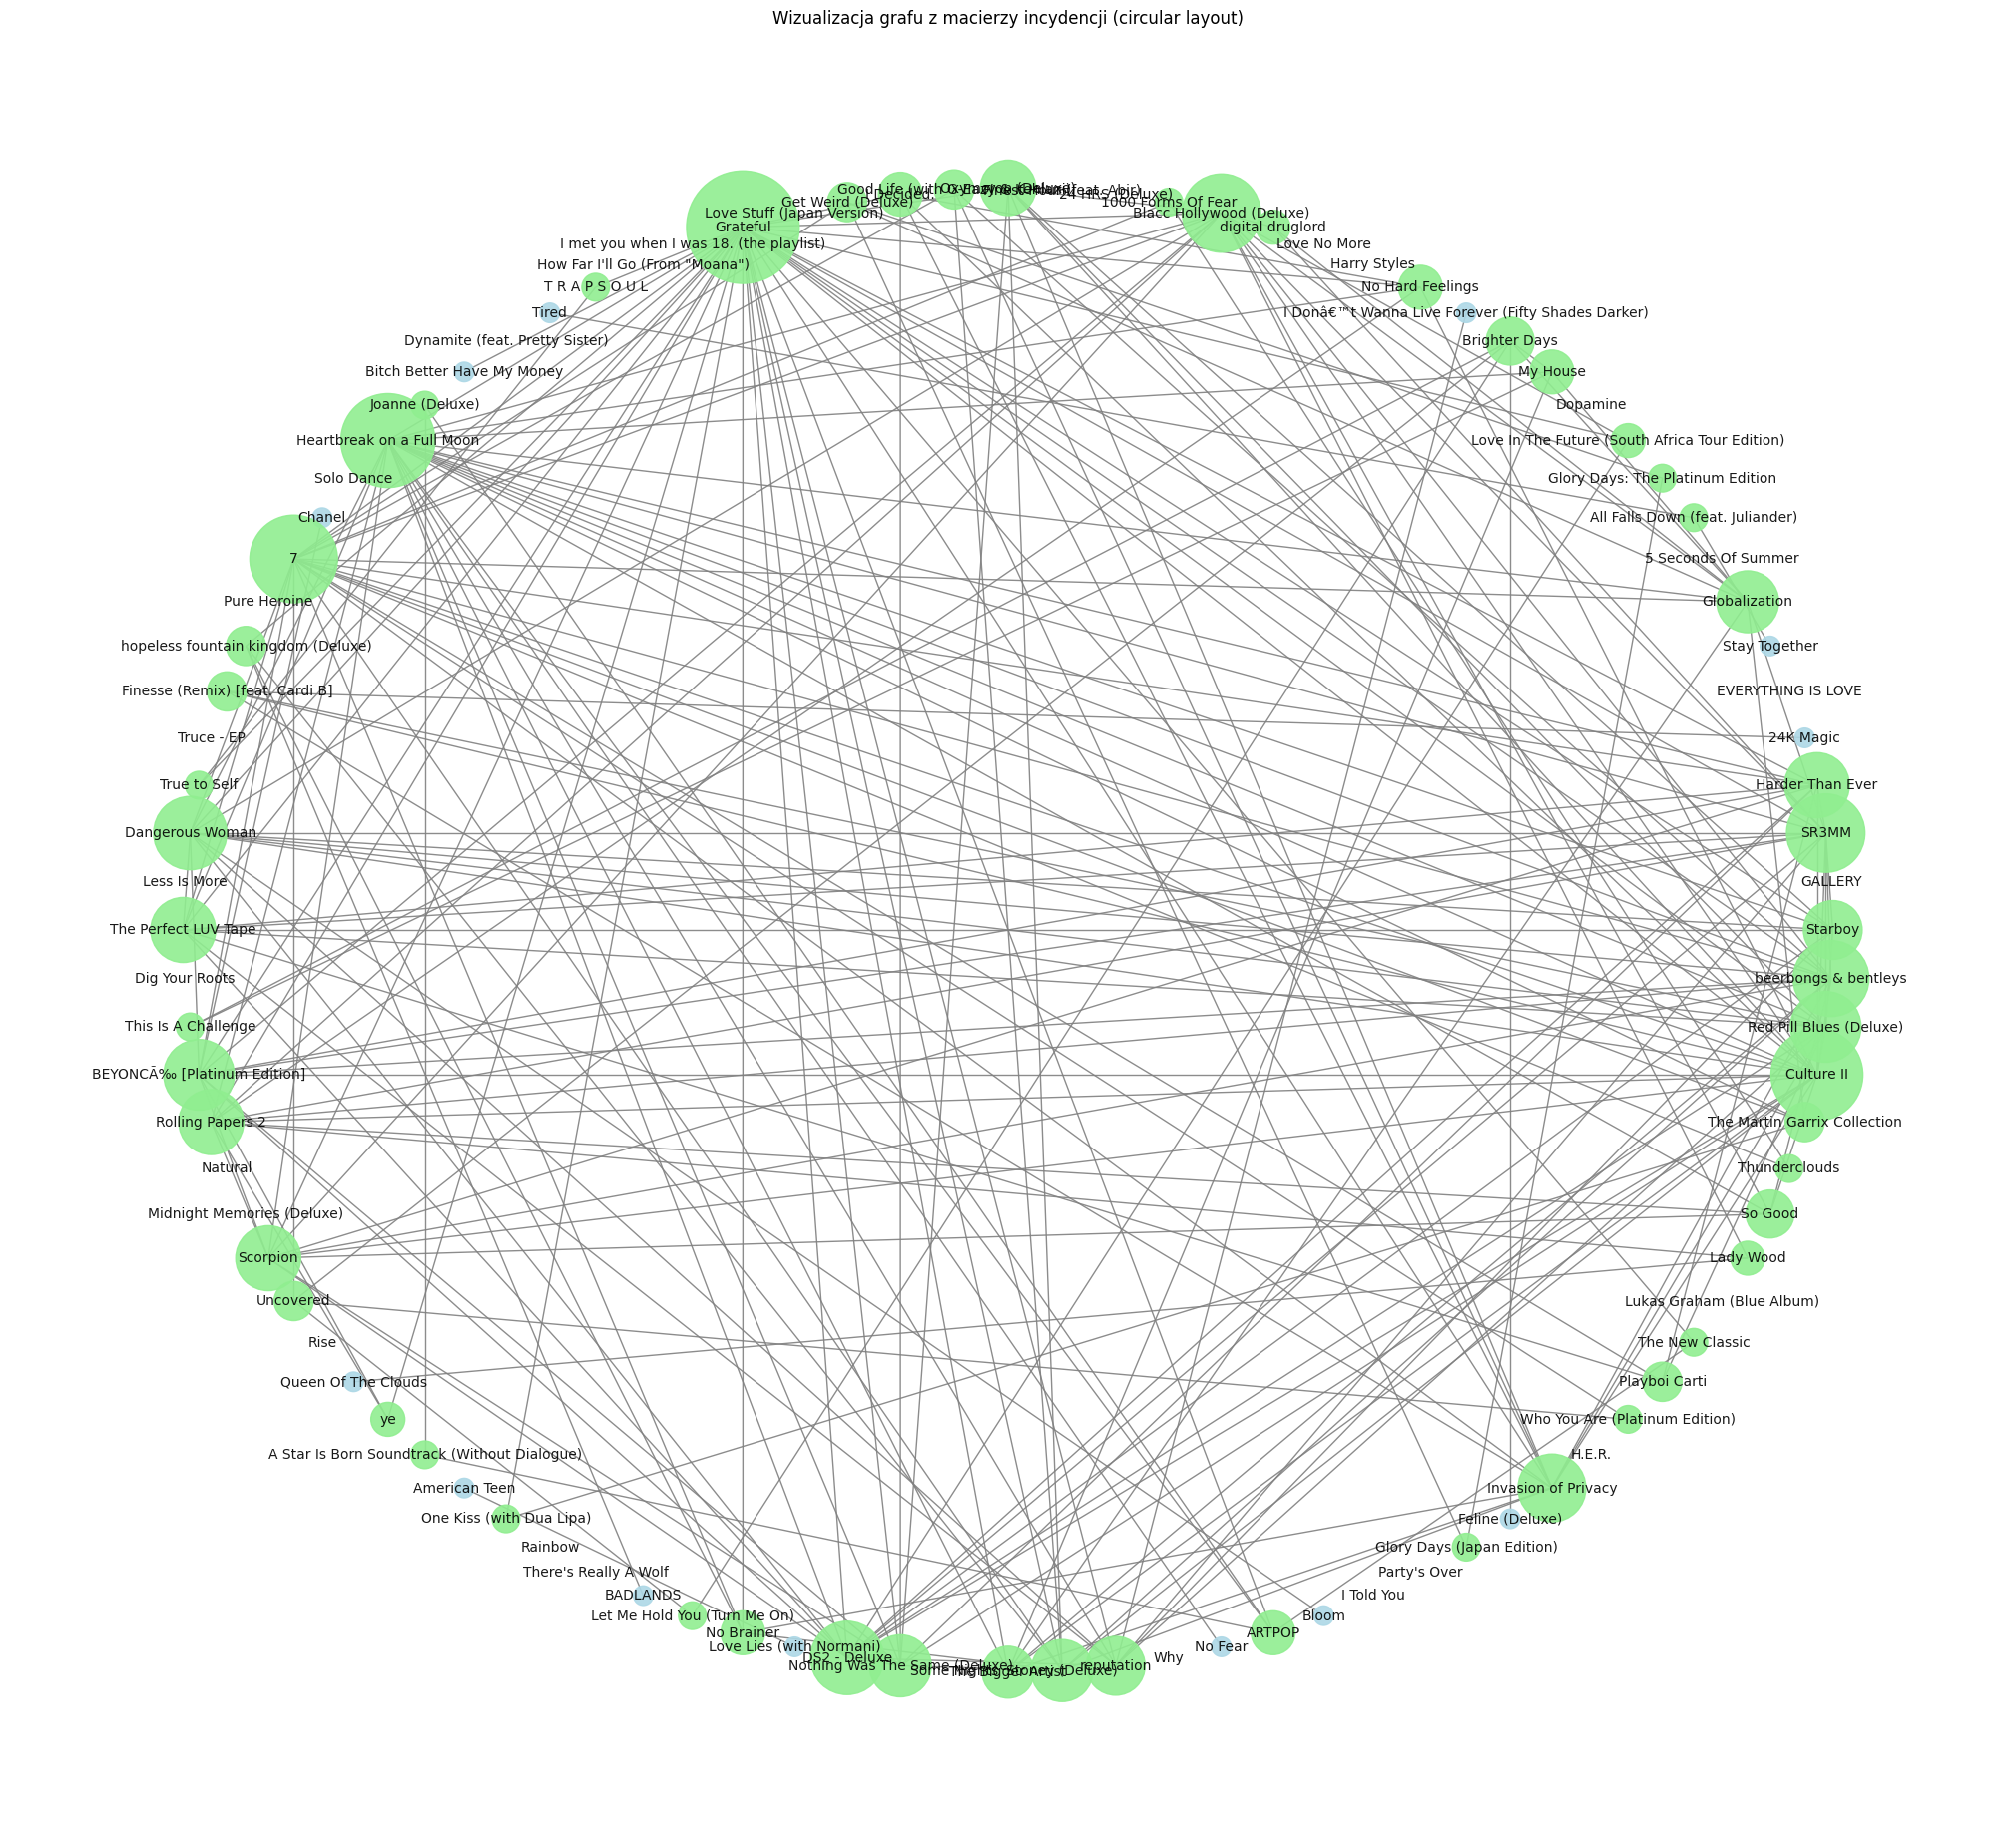

In [71]:
G_incydencji = create_from_inc_matrix(incidence_matrix, list_of_albums)

def show_graph(G):

        pos = nx.circular_layout(G)

        stopnie = [G.degree(n) for n in G.nodes()]

        node_size = np.array(stopnie) * 200  # Skalowanie rozmiaru węzłów na podstawie stopnia
        node_color = ['lightblue' if degree < 2 else 'lightgreen' for degree in stopnie]

        plt.figure(figsize=(20, 18))
        nx.draw(G, pos, with_labels=True, node_color=node_color, 
                node_size=node_size, font_size=10, font_color='black', 
                alpha=0.9, edge_color='gray')

        plt.title("Wizualizacja grafu z macierzy incydencji (circular layout)")
        plt.show()

show_graph(G_incydencji)

In [ ]:
G_sasiedztwa = create_from_adj_matrix(adjacency_matrix, list_of_albums)
show_graph(G_sasiedztwa)

In [68]:
def show_graph2(G):
        pos = nx.spring_layout(G)
        stopnie = [G.degree(n) for n in G.nodes()]

        plt.figure(figsize=(10, 8))
        nx.draw(G, pos, with_labels=True, node_color='lightgreen', 
                node_size=np.array(stopnie) * 200, font_size=10, font_color='black', 
                alpha=0.7, edge_color='gray')

        plt.title("Druga wizualizacja grafu z macierzy incydencji")
        plt.show()

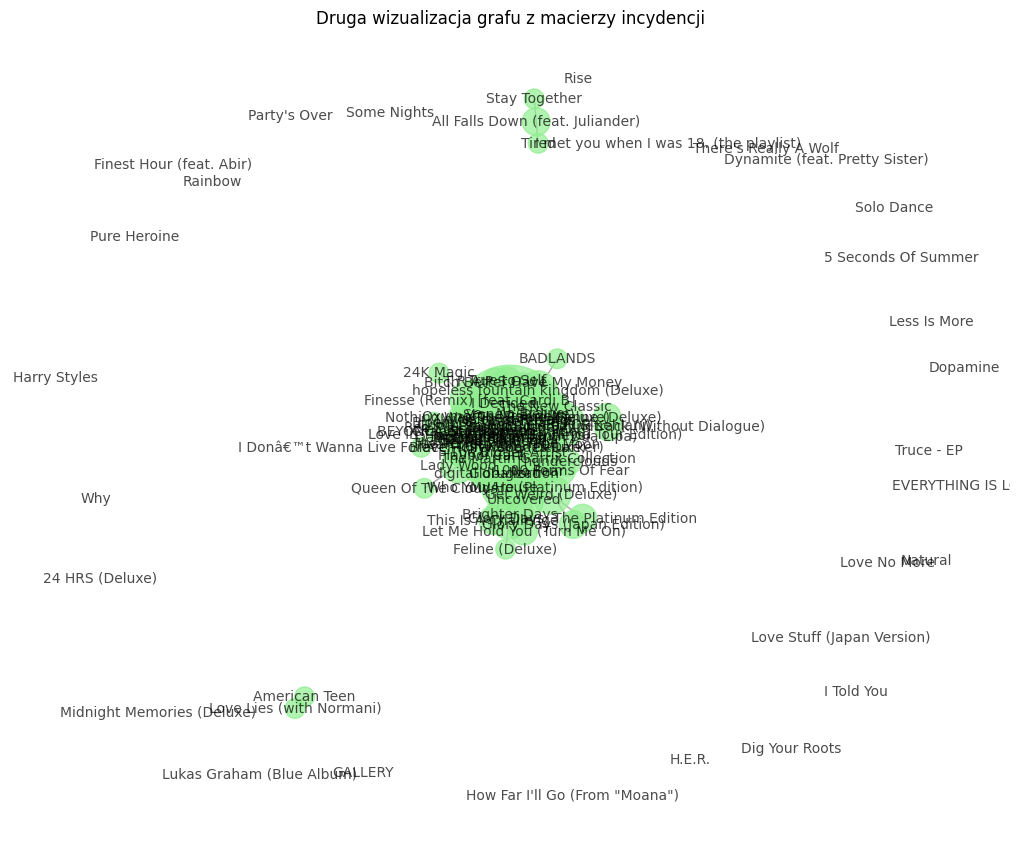

In [72]:
show_graph2(G_incydencji)

In [78]:
from pyvis.network import Network
import networkx as nx
import webbrowser

G = G_incydencji  

net = Network(notebook=True, cdn_resources='in_line')
net.from_nx(G)

html_content = net.generate_html()
with open("graf_incydencji.html", "w", encoding="utf-8") as file:
    file.write(html_content)

webbrowser.open("graf_incydencji.html")


True